In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib as npl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fn
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import mglearn
font_name=fn.FontProperties(fname="C:/WIndows/Fonts/malgun.ttf").get_name()  #한글 꺠짐 패치
plt.rc("font",family=font_name)
npl.rcParams["axes.unicode_minus"]=False
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

C:\Users\kjjs1\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\kjjs1\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [30]:
temp=pd.read_csv("E:\OneDrive\Documents\Programming_Files\Gitwork\FinalProject\Data\movie_total.csv")
temp.head(10)
temp[temp[['멜로/로맨스', '액션', '가족', '뮤지컬', '범죄', '미스터리', '전쟁', '다큐멘터리', '어드벤처', '공연',
       '코미디', '드라마', '서부극(웨스턴)', '스릴러', '판타지', 'SF', '공포(호러)', '사극']]==1].count().sort_values()

movieCd        0
애니메이션          0
hCnt           0
tot            0
w4             0
w3             0
w2             0
w1             0
companys       0
actors         0
directors      0
nations        0
openDt         0
movieNm        0
audits         0
공연             1
서부극(웨스턴)       2
전쟁             8
사극            11
뮤지컬           11
공포(호러)        15
미스터리          23
다큐멘터리         23
가족            32
범죄            43
SF            44
멜로/로맨스        47
판타지           51
스릴러           69
코미디           72
어드벤처          90
액션           113
드라마          211
dtype: int64

In [414]:
temp.columns

Index(['movieCd', 'movieNm', 'openDt', 'nations', 'directors', 'actors',
       'companys', 'audits', 'w1', 'w2', 'w3', 'w4', 'tot', 'hCnt', '애니메이션',
       '멜로/로맨스', '액션', '가족', '뮤지컬', '범죄', '미스터리', '전쟁', '다큐멘터리', '어드벤처', '공연',
       '코미디', '드라마', '서부극(웨스턴)', '스릴러', '판타지', 'SF', '공포(호러)', '사극'],
      dtype='object')

In [415]:
def make_class(temp,col):
    Q1=temp[f'{col}'].quantile(.25)
    Q2=temp[f'{col}'].quantile(.50)
    Q3=temp[f'{col}'].quantile(.75)
    Q4=temp[f'{col}'].quantile(1)
    
    for index in range(len(temp[f'{col}'])):
        if Q3 <= temp.loc[index,f'{col}'] <=Q4:
            temp.loc[index,f'{col}Class']="A"


        elif Q2 <= temp.loc[index,f'{col}'] <Q3:
            temp.loc[index,f'{col}Class']="B"
            continue

        elif Q1 <=temp.loc[index,f'{col}'] < Q2:
            temp.loc[index,f'{col}Class']="C"
            continue

        else :
            temp.loc[index,f'{col}Class']="D"
            continue
    
    return temp

#--------------------------------------------------------------------------------------#
temp=make_class(temp,'tot')
temp=make_class(temp,'w1')
temp=make_class(temp,'w2')
temp=make_class(temp,'w3')
temp=make_class(temp,'w4')
temp.head(5)

,movieCd,movieNm,openDt,nations,directors,actors,companys,audits,w1,w2,...,스릴러,판타지,SF,공포(호러),사극,totClass,w1Class,w2Class,w3Class,w4Class
0,20157042,셜록: 유령신부,20160102,1,1278885,592948,3,2,1086912,1251033,...,0,0,0,0,0,B,A,A,A,A
1,20155422,굿 다이노,20160107,2,1330181,997635,1,1,736477,1103163,...,0,0,0,0,0,A,B,B,A,A
2,20142641,나를 잊지 말아요,20160107,3,427107,1181598,3,3,391766,423624,...,0,0,0,0,0,B,B,B,B,B
3,20158882,유스,20160107,1,35836,17616,1,3,32158,52365,...,0,0,0,0,0,C,D,C,C,C
4,20159510,헤이트풀8,20160107,2,137580,48565,1,4,92834,111986,...,1,0,0,0,0,C,C,C,C,C


In [448]:
data_colums_list=['audits','directors', 'actors', 'companys','nations','액션', '가족', '뮤지컬', '범죄', '미스터리', '전쟁', '다큐멘터리', '어드벤처', '공연', '코미디',
       '드라마', '서부극(웨스턴)', '스릴러', '판타지', 'SF', '공포(호러)', '사극','hCnt']
data_g_list=['액션', '가족', '뮤지컬', '범죄', '미스터리', '전쟁', '다큐멘터리', '어드벤처', '공연', '코미디',
             '드라마', '서부극(웨스턴)', '스릴러', '판타지', 'SF', '공포(호러)', '사극']
week_list=["w1","w2","w3"]

data_colums_list.extend(week_list)
target_class="w4Class"

data=temp[data_g_list]
target=temp[target_class]

In [449]:
len(data_colums_list)

26

# Decision Tree

In [450]:
X_train, X_test, y_train, y_test = train_test_split(data, target,stratify=target,random_state=0,train_size=0.80)

In [451]:
tree = DecisionTreeClassifier(random_state=0, max_depth=5,criterion='entropy')
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [452]:
print("Train acc",tree.score(X_train,y_train))
print("Test acc",tree.score(X_test,y_test))

Train acc 0.42660550458715596
Test acc 0.34545454545454546


Index(['액션', '가족', '뮤지컬', '범죄', '미스터리', '전쟁', '다큐멘터리', '어드벤처', '공연', '코미디',
       '드라마', '서부극(웨스턴)', '스릴러', '판타지', 'SF', '공포(호러)', '사극'],
      dtype='object') [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [0.30614665 0.         0.         0.16713629 0.03270592 0.
 0.05212656 0.07625859 0.         0.0097107  0.10887085 0.
 0.08340198 0.0478362  0.03847997 0.         0.0773263 ]


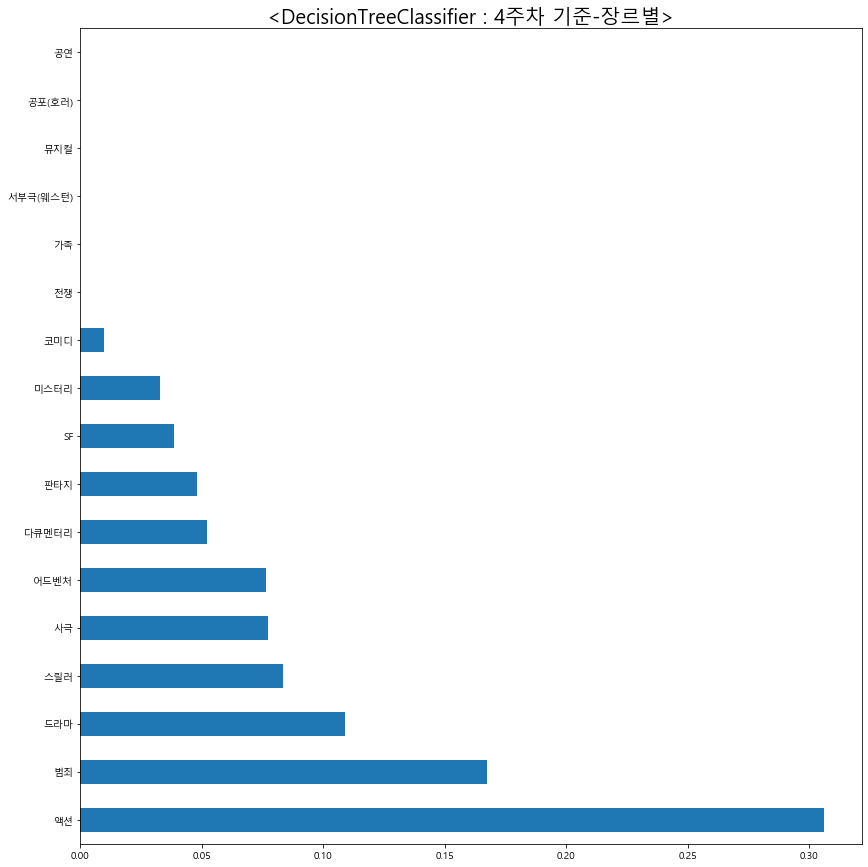

In [453]:
def plot_feature_importances_cancer(model,score,x_text,X):
    name=type(model).__name__
    txt=score.round(2).astype('str')
    num=4
    n_features = data.shape[1]
    print(data.columns,np.arange(n_features), model.feature_importances_)
    plt.rcParams["figure.figsize"] = (14,15)
    #plt.barh(range(n_features), model.feature_importances_, align="center")
    #plt.yticks(np.arange(n_features), data.columns,fontsize=12)
    
    #plt.text(x_text, 0.9,"acc : "+txt,fontsize=20);
    plt.text(x_text, 0.9,"acc : "+txt,fontsize=20,clip_on=True);
    
    plt.title(f"<{name} : {num}주차 기준-장르별>",fontsize=20)
    
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    #feat_importances.nsmallest(19).plot(kind='barh')
    feat_importances.nlargest(19).plot(kind='barh')
    
    plt.savefig(f'img/{name}_image_{num}주_장르.png',dpi=300)
plot_feature_importances_cancer(tree,tree.score(X_test,y_test),0.9,X_train)

# Random Forset

In [454]:
from sklearn.ensemble import RandomForestClassifier

In [455]:
forest = RandomForestClassifier(random_state=0, n_estimators=144,criterion='entropy').fit(X_train,y_train)
forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=144,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [456]:
print("RTrain acc",forest.score(X_train,y_train))
print("RTest acc",forest.score(X_test,y_test))

RTrain acc 0.5275229357798165
RTest acc 0.39090909090909093


Index(['액션', '가족', '뮤지컬', '범죄', '미스터리', '전쟁', '다큐멘터리', '어드벤처', '공연', '코미디',
       '드라마', '서부극(웨스턴)', '스릴러', '판타지', 'SF', '공포(호러)', '사극'],
      dtype='object') [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16] [0.14320169 0.05897227 0.03874063 0.08746346 0.04715346 0.02086801
 0.03571157 0.09413475 0.00468346 0.07113885 0.10316034 0.00938814
 0.07865178 0.06982206 0.0663305  0.02674528 0.04383375]


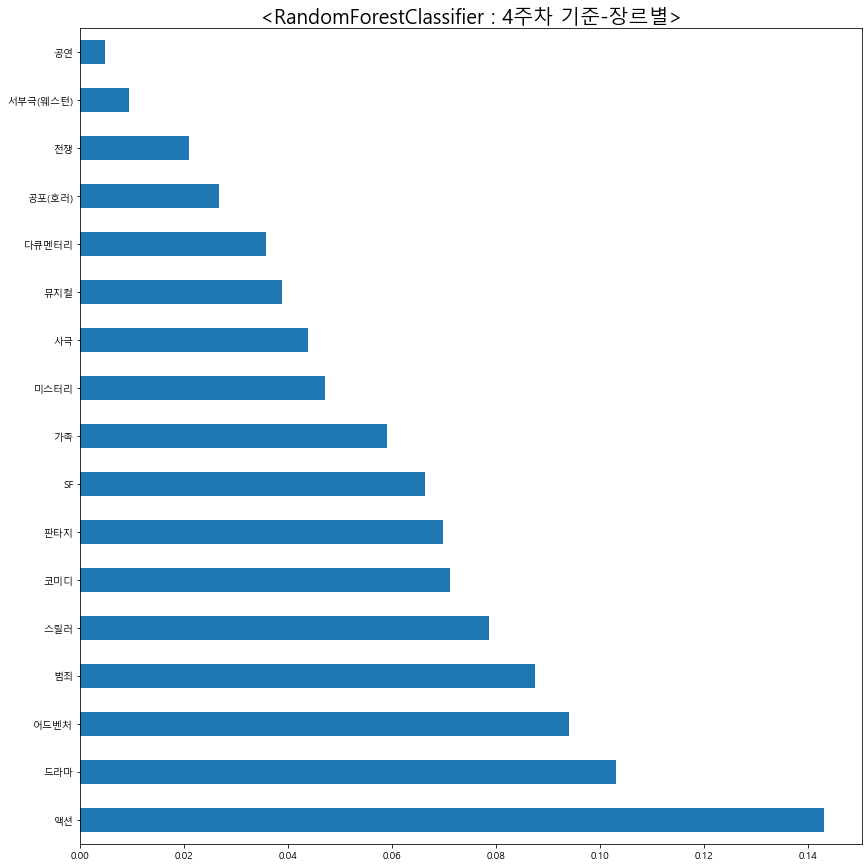

In [457]:
plot_feature_importances_cancer(forest,forest.score(X_test,y_test),0.4,X_test)

# SVM

In [437]:
from sklearn.svm import SVC

In [294]:
svm = SVC(C=10) #defult C=1, gamma = 1/특성의 갯수(X_train,shape[1])
svm.fit(X_train,y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [295]:
print("훈련 결과 :",svm.score(X_train,y_train))
print("테스트 결과 :",svm.score(X_test,y_test))

훈련 결과 : 0.8692660550458715
테스트 결과 : 0.8363636363636363
